In [13]:
import pandas as pd
from UtilsCreateDataFrame import *
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np 
from dataclasses import dataclass
import matplotlib.pyplot as plt

In [4]:
input_folder = "H:"
output_folder = "H:"
date = "2021-01"
to_save = True
tickers = ["BTC", "ETH"]

df = createDataFrame(
    input_folder=input_folder,
    date=date,
    tickers=tickers,
    frequency="1min",
    n_job=4,
    to_save=to_save,
)

In [5]:
@dataclass(slots = True)
class ResultLR:
    beta : float
    intercept : float
    r2 : float
    residuals : np.array 


def linearRegression(df, x_name , y_name):
    """
    function that fits a linear regression and return several objects: 
    Inputs: 
        -df: pd.DataFrame
                pandas dataframe containing as columns the assets
        -x_name: str
                asset to use as x, e.g. "BTC"
        -y_name: str
                asset to use as y: e.g. "ETH"
    Outputs:
        -result: ResultLR
    
    """
    #create x vector and y vector 
    x = df[x_name].to_numpy().reshape(-1,1)
    y = df[y_name].to_numpy().reshape(-1,1)
    #fit the model
    mod = LinearRegression().fit(x, y)
    #predicted values
    pred = mod.predict(x).reshape(-1,1)
    r2 = r2_score(y_true = y, y_pred = pred)
    residuals = y.flatten() - pred.flatten()
    result = ResultLR(mod.coef_.item(), mod.intercept_.item(), r2, residuals)
    return result

result = linearRegression(df.iloc[0:100], "BTC", "ETH")

In [10]:
result.beta

0.020516643917401427

In [11]:
result.intercept

140.34541445405068

In [12]:
result.r2

0.9408645787263595

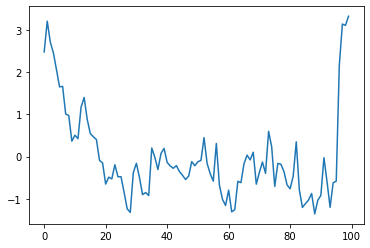

In [15]:
plt.plot(result.residuals)